# Analysis Based on City Type

In [39]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

## Deliverable 1: Summary DataFrame 

In [40]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [41]:
# Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [42]:
# Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [43]:
# Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [44]:
# Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_rides_by_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [45]:
# Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [46]:
# Create a PyBer summary DataFrame. 
columns = {'total_rides_raw': total_rides_by_type, 
           'total_drivers_raw': total_drivers_by_type, 
           'total_fares_raw': total_fares, 
           'average_fare_per_ride_raw': avg_fare_per_ride,
           'average_fare_per_driver_raw': avg_fare_per_driver}

pyber_summary_df = pd.DataFrame(columns)

pyber_summary_df.index.name = None
    
pyber_summary_df

,total_rides_raw,total_drivers_raw,total_fares_raw,average_fare_per_ride_raw,average_fare_per_driver_raw
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [47]:
# Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [48]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['total_rides_raw'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['total_drivers_raw'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['total_fares_raw'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['average_fare_per_ride_raw'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['average_fare_per_driver_raw'].map('${:,.2f}'.format)

pyber_summary_df[['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Ride', 'Average Fare per Driver']]

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$24.53,$16.57


## Deliverable 2.  Multiple line plot shoiwng the total weekly fares for each type of city.

In [49]:
# Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [50]:
# Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_type_date_df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fare_type_date_df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [51]:
# Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fare_type_date_df = fare_type_date_df.reset_index()
fare_type_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [52]:
# Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_type_date_df_pivot = fare_type_date_df.pivot(index = 'date', 
                                                  columns = 'type',
                                                  values = 'fare')
fare_type_date_df_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [53]:
# Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_date_df = fare_type_date_df.loc['2019-01-01':'2019-04-29']

fare_by_date_df.head()

,type,date,fare


In [54]:
# Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
fare_by_date_df = fare_type_date_df.loc['2019-01-01':'2019-04-29']

fare_by_date_df.index = pd.to_datetime(fare_by_date_df.index)

fare_by_date_df.head()

,type,date,fare


In [55]:
# Check that the datatype for the index is datetime using df.info()
fare_by_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    0 non-null      object 
 1   date    0 non-null      object 
 2   fare    0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [56]:
# Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_date_df = fare_by_date_df.resample('W').sum()
fare_by_date_df

,type,date,fare


KeyError: 'Urban'

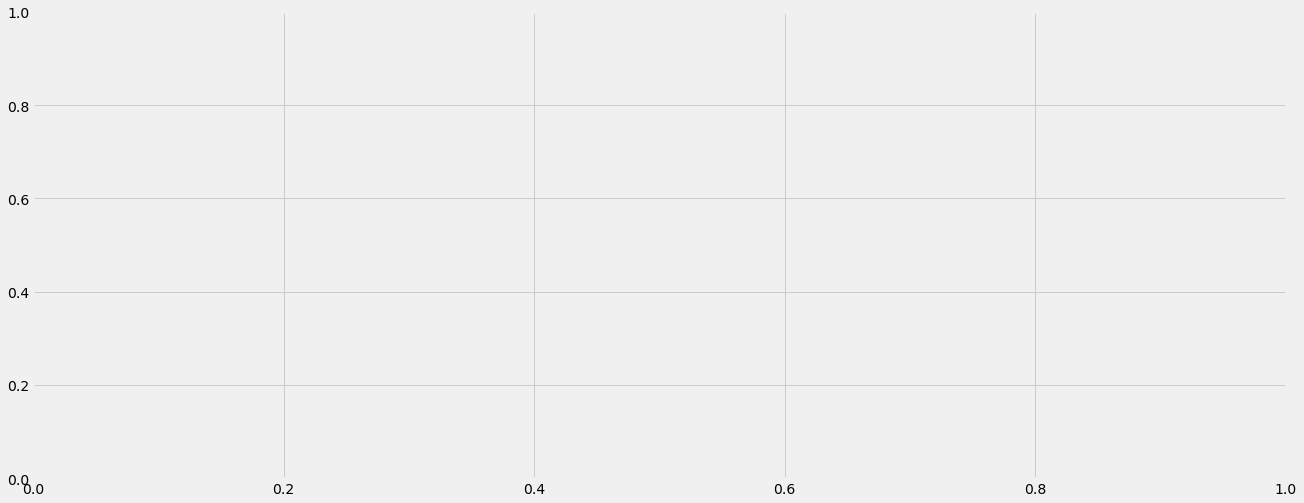

In [57]:
# Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.dates as mdates

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig = plt.figure(figsize = (20, 8))
ax = plt.axes()
ax.plot(fare_by_date_df.index, 
        fare_by_date_df['Urban'],
        color = '#ffcad4',
        label = 'Urban')
ax.plot(fare_by_date_df.index, 
        fare_by_date_df['Suburban'],
        color = '#b0d0d3',
        label = 'Suburban')
ax.plot(fare_by_date_df.index, 
        fare_by_date_df['Rural'],
        color = '#f7af9d',
        label = 'Rural')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($USD)')
ax.legend()

plt.savefig("Plots_and_Figures/Fig9.png")

plt.show()